In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from matplotlib import pyplot as plt
import numpy as np

In [2]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [3]:
list_com_interest = [{"symbol" : "FPT","link" : 'FPT-cong-ty-co-phan-fpt.chn'},
                     {"symbol" : "VJC","link" : 'VJC-cong-ty-co-phan-hang-khong-vietet.chn'},
                     {"symbol" : "HVN","link" : 'HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn'}]
data = []
for com in list_com_interest:
    row = [com['symbol']]
    url = 'https://s.cafef.vn/hose/{}'.format(com['link'])
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    div_dltl = soup.find("div", "dltlu-point up")

https://s.cafef.vn/hose/FPT-cong-ty-co-phan-fpt.chn
https://s.cafef.vn/hose/VJC-cong-ty-co-phan-hang-khong-vietet.chn
https://s.cafef.vn/hose/HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn


In [4]:
list_com_interest = [{"symbol" : "FPT","link" : 'FPT-cong-ty-co-phan-fpt.chn'},
                     {"symbol" : "VJC","link" : 'VJC-cong-ty-co-phan-hang-khong-vietet.chn'},
                     {"symbol" : "HVN","link" : 'HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn'}]
data = []
for com in list_com_interest:
    row = [com['symbol']]
    url = 'https://s.cafef.vn/hose/{}'.format(com['link'])
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    div_dltl = soup.find("div", "dltl-wrap")
    
    if com['symbol'] == 'FPT':
        gia_tham_chieu = div_dltl.find(class_="eq r").text.strip()
        gia_tran = div_dltl.find(class_="r pink").text.strip()
        gia_san = div_dltl.find(class_="r fl").text.strip()
        gia_mo_cua = div_dltl.find(class_="right up").text.strip()

    if com['symbol'] == 'VJC':
        gia_tham_chieu = div_dltl.find(class_="eq r").text.strip()
        gia_tran = div_dltl.find(class_="r pink").text.strip()
        gia_san = div_dltl.find(class_="r fl").text.strip()
        gia_mo_cua = div_dltl.find(class_="right up").text.strip()
                                      
    if com['symbol'] == 'HVN':
        gia_tham_chieu = div_dltl.find(class_="eq r").text.strip()
        gia_tran = div_dltl.find(class_="r pink").text.strip()
        gia_san = div_dltl.find(class_="r fl").text.strip()
        gia_mo_cua = div_dltl.find(class_="right up").text.strip()
    d = {'Symbol': com["symbol"], 'Giá tham chiếu':gia_tham_chieu, 'Giá trần':gia_tran, 'Giá sàn':gia_san, 'Giá mở cửa': gia_mo_cua}
    data.append(d)
df = pd.DataFrame(data)
df



https://s.cafef.vn/hose/FPT-cong-ty-co-phan-fpt.chn
https://s.cafef.vn/hose/VJC-cong-ty-co-phan-hang-khong-vietet.chn
https://s.cafef.vn/hose/HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn


,Symbol,Giá tham chiếu,Giá trần,Giá sàn,Giá mở cửa
0,FPT,74.3,79.5,69.1,74.5
1,VJC,102.8,109.9,95.7,103
2,HVN,10.35,11.05,9.63,10.5


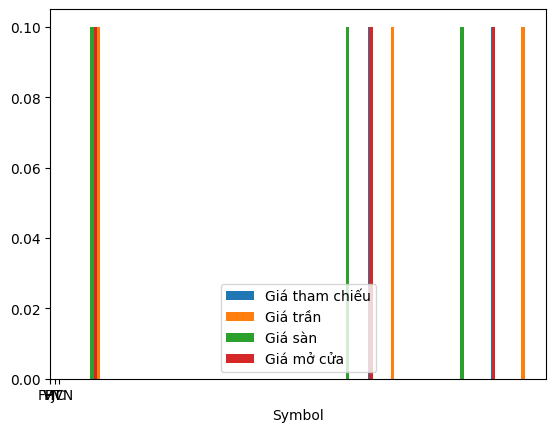

In [6]:
for i in range(len(df)):
    df['Giá tham chiếu'][i] = float(df['Giá tham chiếu'][i])
    df['Giá trần'][i] = float(df['Giá trần'][i])
    df['Giá sàn'][i] = float(df['Giá sàn'][i])
    df['Giá mở cửa'][i] = float(df['Giá mở cửa'][i])
index = np.arange(len(df["Symbol"]))
fig, ax = plt.subplots()
plt.bar(np.array(df["Giá tham chiếu"]), 0.1, label = "Giá tham chiếu")
plt.bar( np.array(df["Giá trần"]),0.1, label = "Giá trần")
plt.bar( np.array(df["Giá sàn"]),0.1, label = "Giá sàn")
plt.bar( np.array(df["Giá mở cửa"]),0.1, label = "Giá mở cửa")

ax.set_xlabel('Symbol')
ax.set_xticks(index)
ax.set_xticklabels(('FPT', 'VJC', 'HVN'))
ax.legend()
plt.xticks()
plt.show()

In [ ]:
index = np.arange(len(df["Symbol"]))
print(index)
fig, ax = plt.subplots()
plt.bar(np.array(df["Giá tham chiếu"]), 0.1, label = "Giá tham chiếu")